# SF Network

In [1]:
from To_sim.for_multi import get_r_sigma_Z_D,get_r_sigma_Z_MF_D
import numpy as np
import parmap
from tqdm.notebook import tqdm
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import glob
from To_sim.for_multi import get_sol,get_sol_MF,get_sol_Last,get_sol_MF_Last

In [16]:
N = 1000
np.random.seed(0)
theta_random = np.random.uniform(0,2*np.pi,N)
omega = 1
K,b = 5,0.5
db = 0.05
t_end,dt = 400,0.1
t = np.arange(0, t_end+dt/2, dt)
Ds = np.arange(0,4+db/2,db)

b = 1.1
D = 1.5

In [32]:
Ds = np.linspace(0.0,2.0,41)

In [33]:
N_SF = pickle.load(open('DATA/SF GRAPH/SF.pickle','rb'))
mk = N_SF[0,'mk']
Aij= N_SF[0,'Aij']
G = N_SF[0,'G']

In [34]:
B_RM,B_S,B_C = [],[],[]
B_RA = []
B_Ts = []

In [51]:
for seed in tqdm(range(40)):
    np.random.seed(0)
    theta_random = np.random.uniform(0,2*np.pi,N)
    B_ra = []
    B_rm = []
    B_sigmas = []
    B_chis = []
    Ts = []

    for T,RA,RM,chi,sigma_phi in parmap.map(get_sol_Last,Ds,theta_random,t,b,omega,N,K,mk,Aij,pm_pbar=False, pm_processes=8):
        Ts.append(T)
        B_ra.append(RA)
        B_rm.append(RM)
        B_sigmas.append(sigma_phi)
        B_chis.append(chi)
    B_RM.append(B_rm)
    B_RA.append(B_ra)
    B_S.append(B_sigmas)
    B_C.append(B_chis)
    B_Ts.append(Ts)

  0%|          | 0/40 [00:00<?, ?it/s]

In [ ]:
for seed in tqdm(range(20)):
    np.random.seed(0)
    theta_random = np.random.uniform(0,2*np.pi,N)
    B_ra = []
    B_rm = []
    B_sigmas = []
    B_chis = []
    Ts = []

    for T,RA,RM,chi,sigma_phi in parmap.map(get_sol_Last,Ds,theta_random,t,b,omega,N,K,mk,Aij,pm_pbar=False, pm_processes=8):
        Ts.append(T)
        B_ra.append(RA)
        B_rm.append(RM)
        B_sigmas.append(sigma_phi)
        B_chis.append(chi)
    B_RM.append(B_rm)
    B_RA.append(B_ra)
    B_S.append(B_sigmas)
    B_C.append(B_chis)
    B_Ts.append(Ts)

In [6]:
N_ER.keys()

NameError: name 'N_ER' is not defined

In [36]:
ND= N_SF[0,'D']
Arg_D = np.argsort(ND)

In [ ]:
B_T = np.array(B_Ts)

In [ ]:
np.savez('DATA/SF Rotation 70',B_RM = B_RM,B_S=B_S,B_C=B_C,B_T=B_T,Ds=Ds)

In [38]:
B_T[8][np.argsort(B_T[8]//(2*np.pi))]

IndexError: index 655 is out of bounds for axis 0 with size 41

In [39]:
CL = nx.closeness_centrality(G)
CL_a = np.array([*CL.values()])

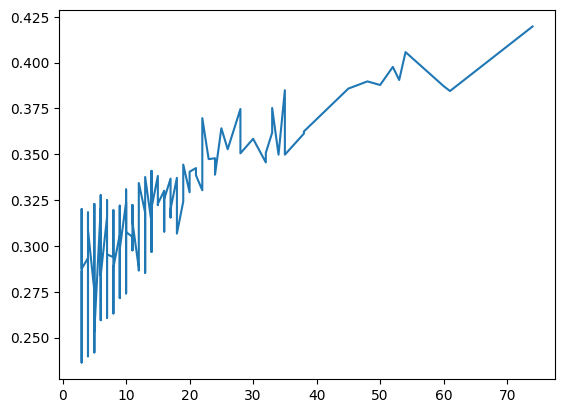

In [40]:
plt.plot(ND[Arg_D],CL_a[Arg_D])

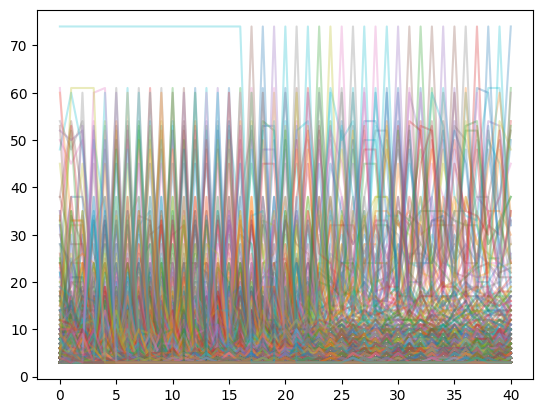

In [41]:
plt.plot(ND[np.argsort(B_T[8]//(2*np.pi))],alpha=0.3)


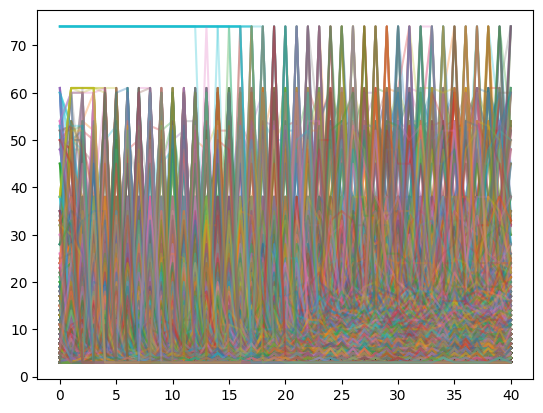

In [42]:
for i in range(len(B_T)):
    plt.plot(ND[np.argsort(B_T[i])],alpha=0.3)

In [43]:
UND = np.unique(ND)
arg_ND = {}
for D_ in UND:
    arg_ND[D_], = np.where(ND==D_)

In [45]:
import matplotlib as mpl
import matplotlib.colors as colors

Text(0.5, 1.0, '$k$')

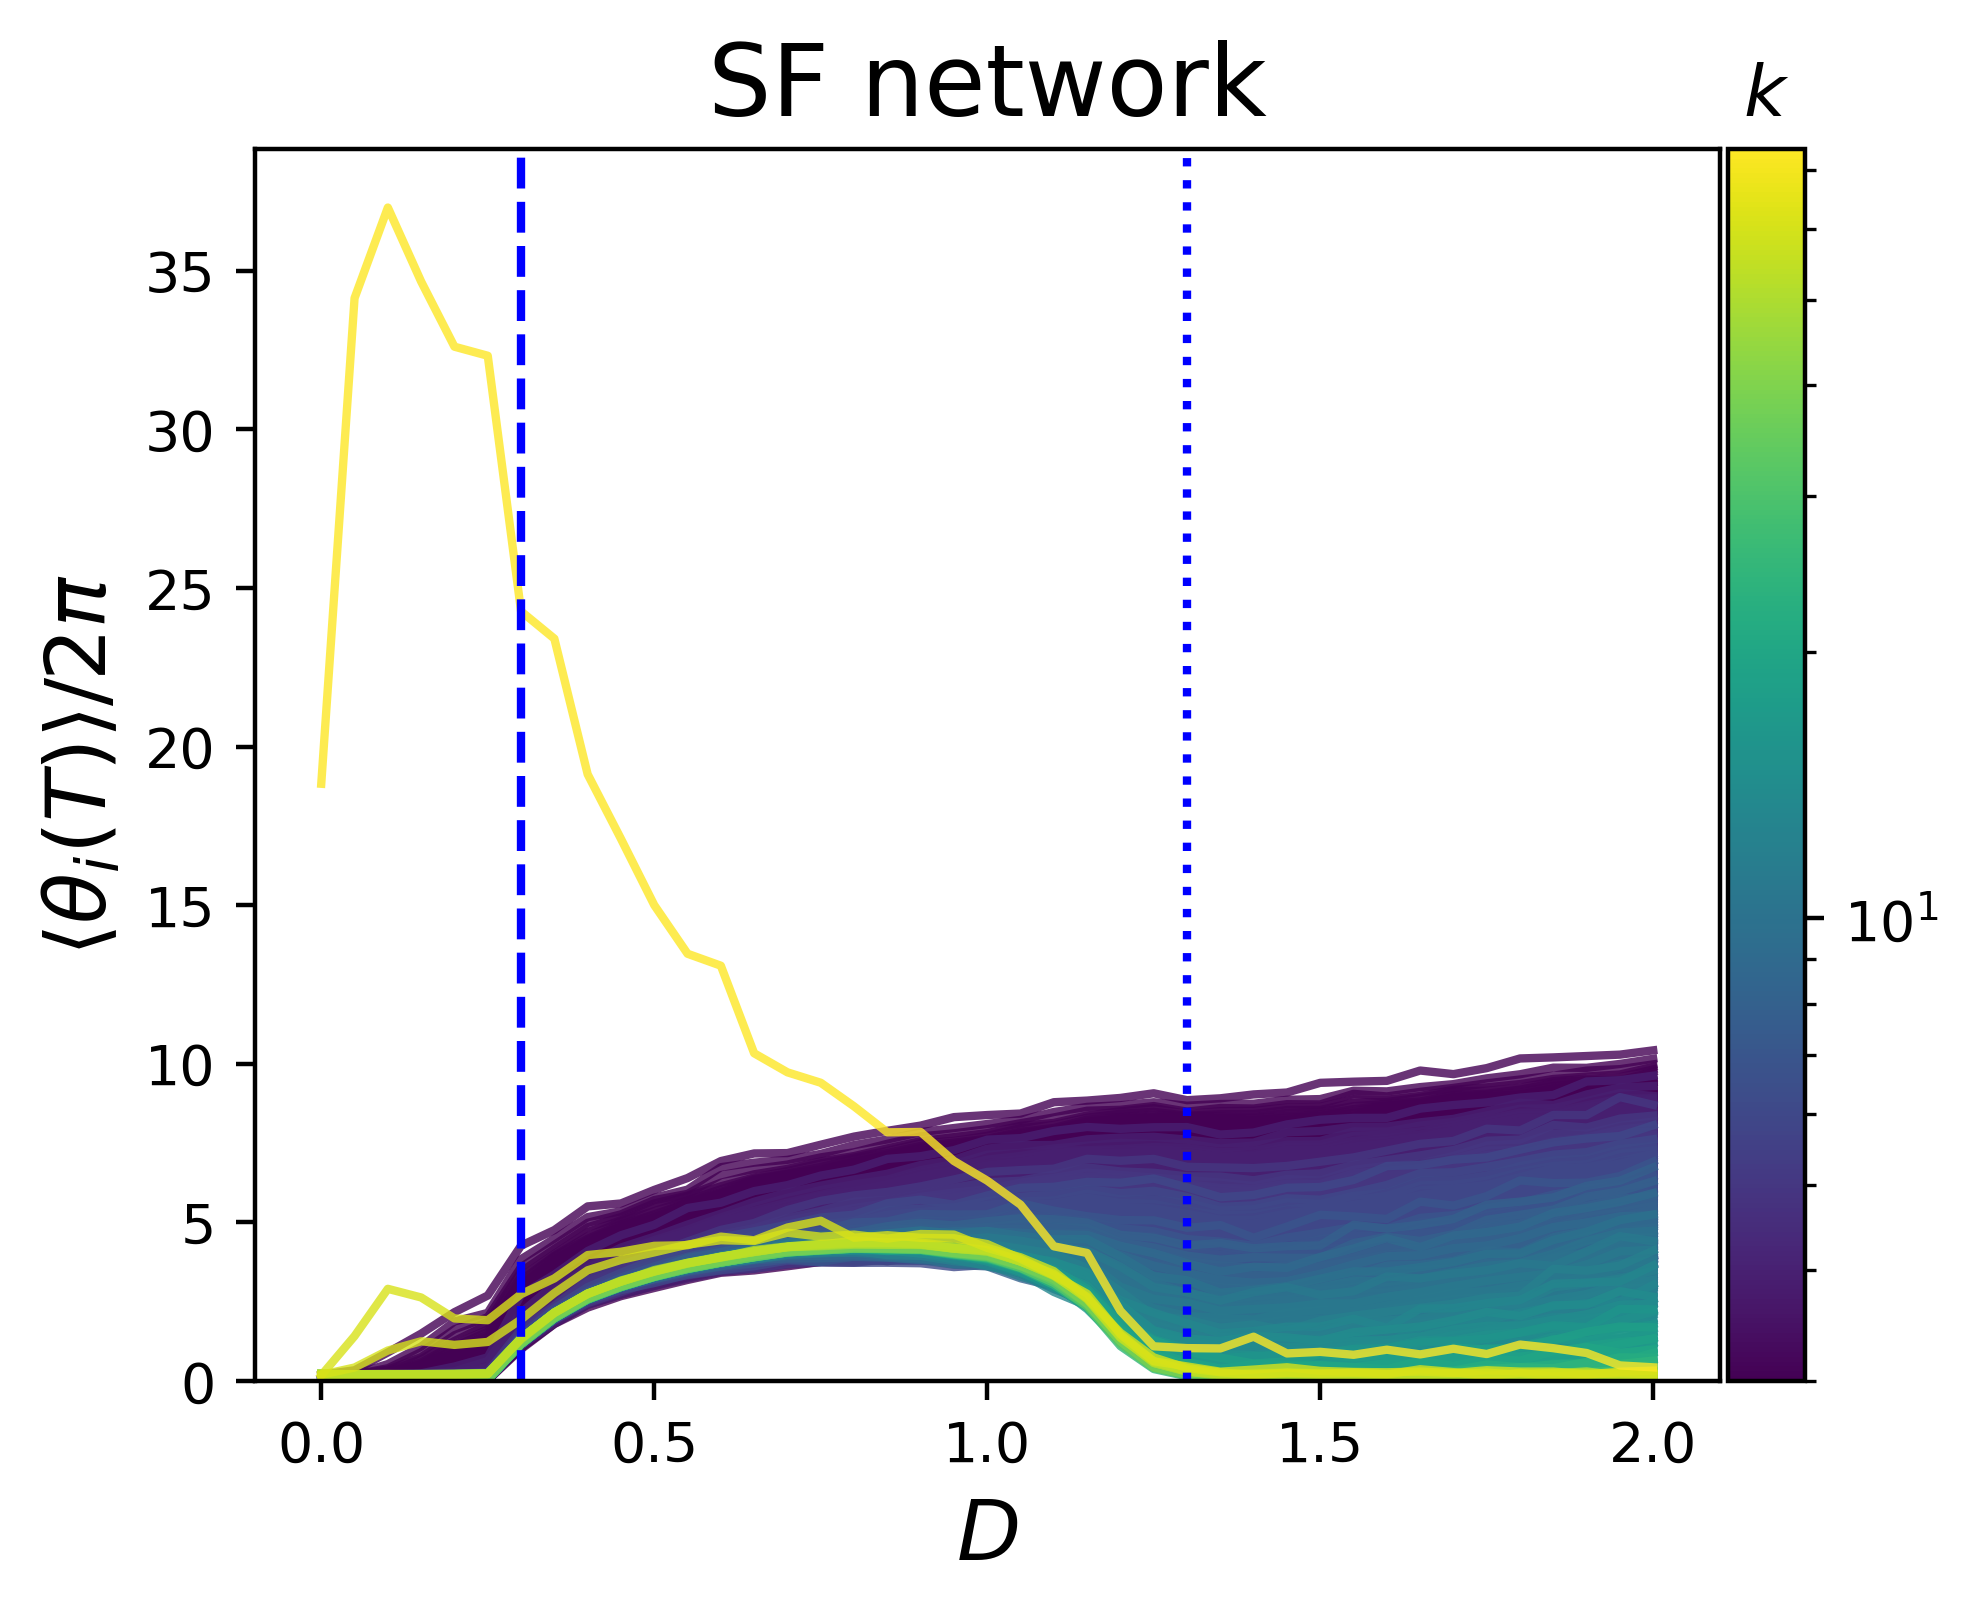

In [49]:
fig,(ax1,cbar_ax) = plt.subplots(1,2,gridspec_kw={'width_ratios': [19, 1]},dpi=400,figsize=(5,4))
plt.sca(ax1)
norm = colors.LogNorm(vmin=np.min(UND),vmax=np.max(UND))
cm = plt.cm.viridis
for D_ in UND:
    B_TN = B_T[:,:,arg_ND[D_]]/(np.pi*2)
    B_TN = np.sort(B_TN,axis=2)/(np.pi*2)
    B_TNM = np.mean(B_TN,axis=0)
    B_TNS = np.std(B_TN,axis=0)
    plt.plot(Ds,B_TNM,color=cm(norm(D_)),alpha=0.8)
    # plt.plot(Ds,np.sort(B_T[:,:,arg_ND[D_]]//(np.pi*2),axis=1),color=c,alpha=0.8)

# plt.colorbar()

plt.axvline(0.3,color='blue',ls='--')
plt.axvline(1.3,color='blue',ls=':')

plt.ylabel(r'$\langle\theta_i(T)\rangle/2\pi$',fontsize=15)
plt.xlabel(r'$D$',fontsize=15)
plt.ylim(0,)
# plt.xlim(0,2)
plt.subplots_adjust(wspace=0.01)
plt.title('SF network',fontsize=18)
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cm, norm=norm, orientation='vertical')
cb1.ax.set_title(r'$k$',fontsize=13)

Text(0.5, 1.0, 'SF network')

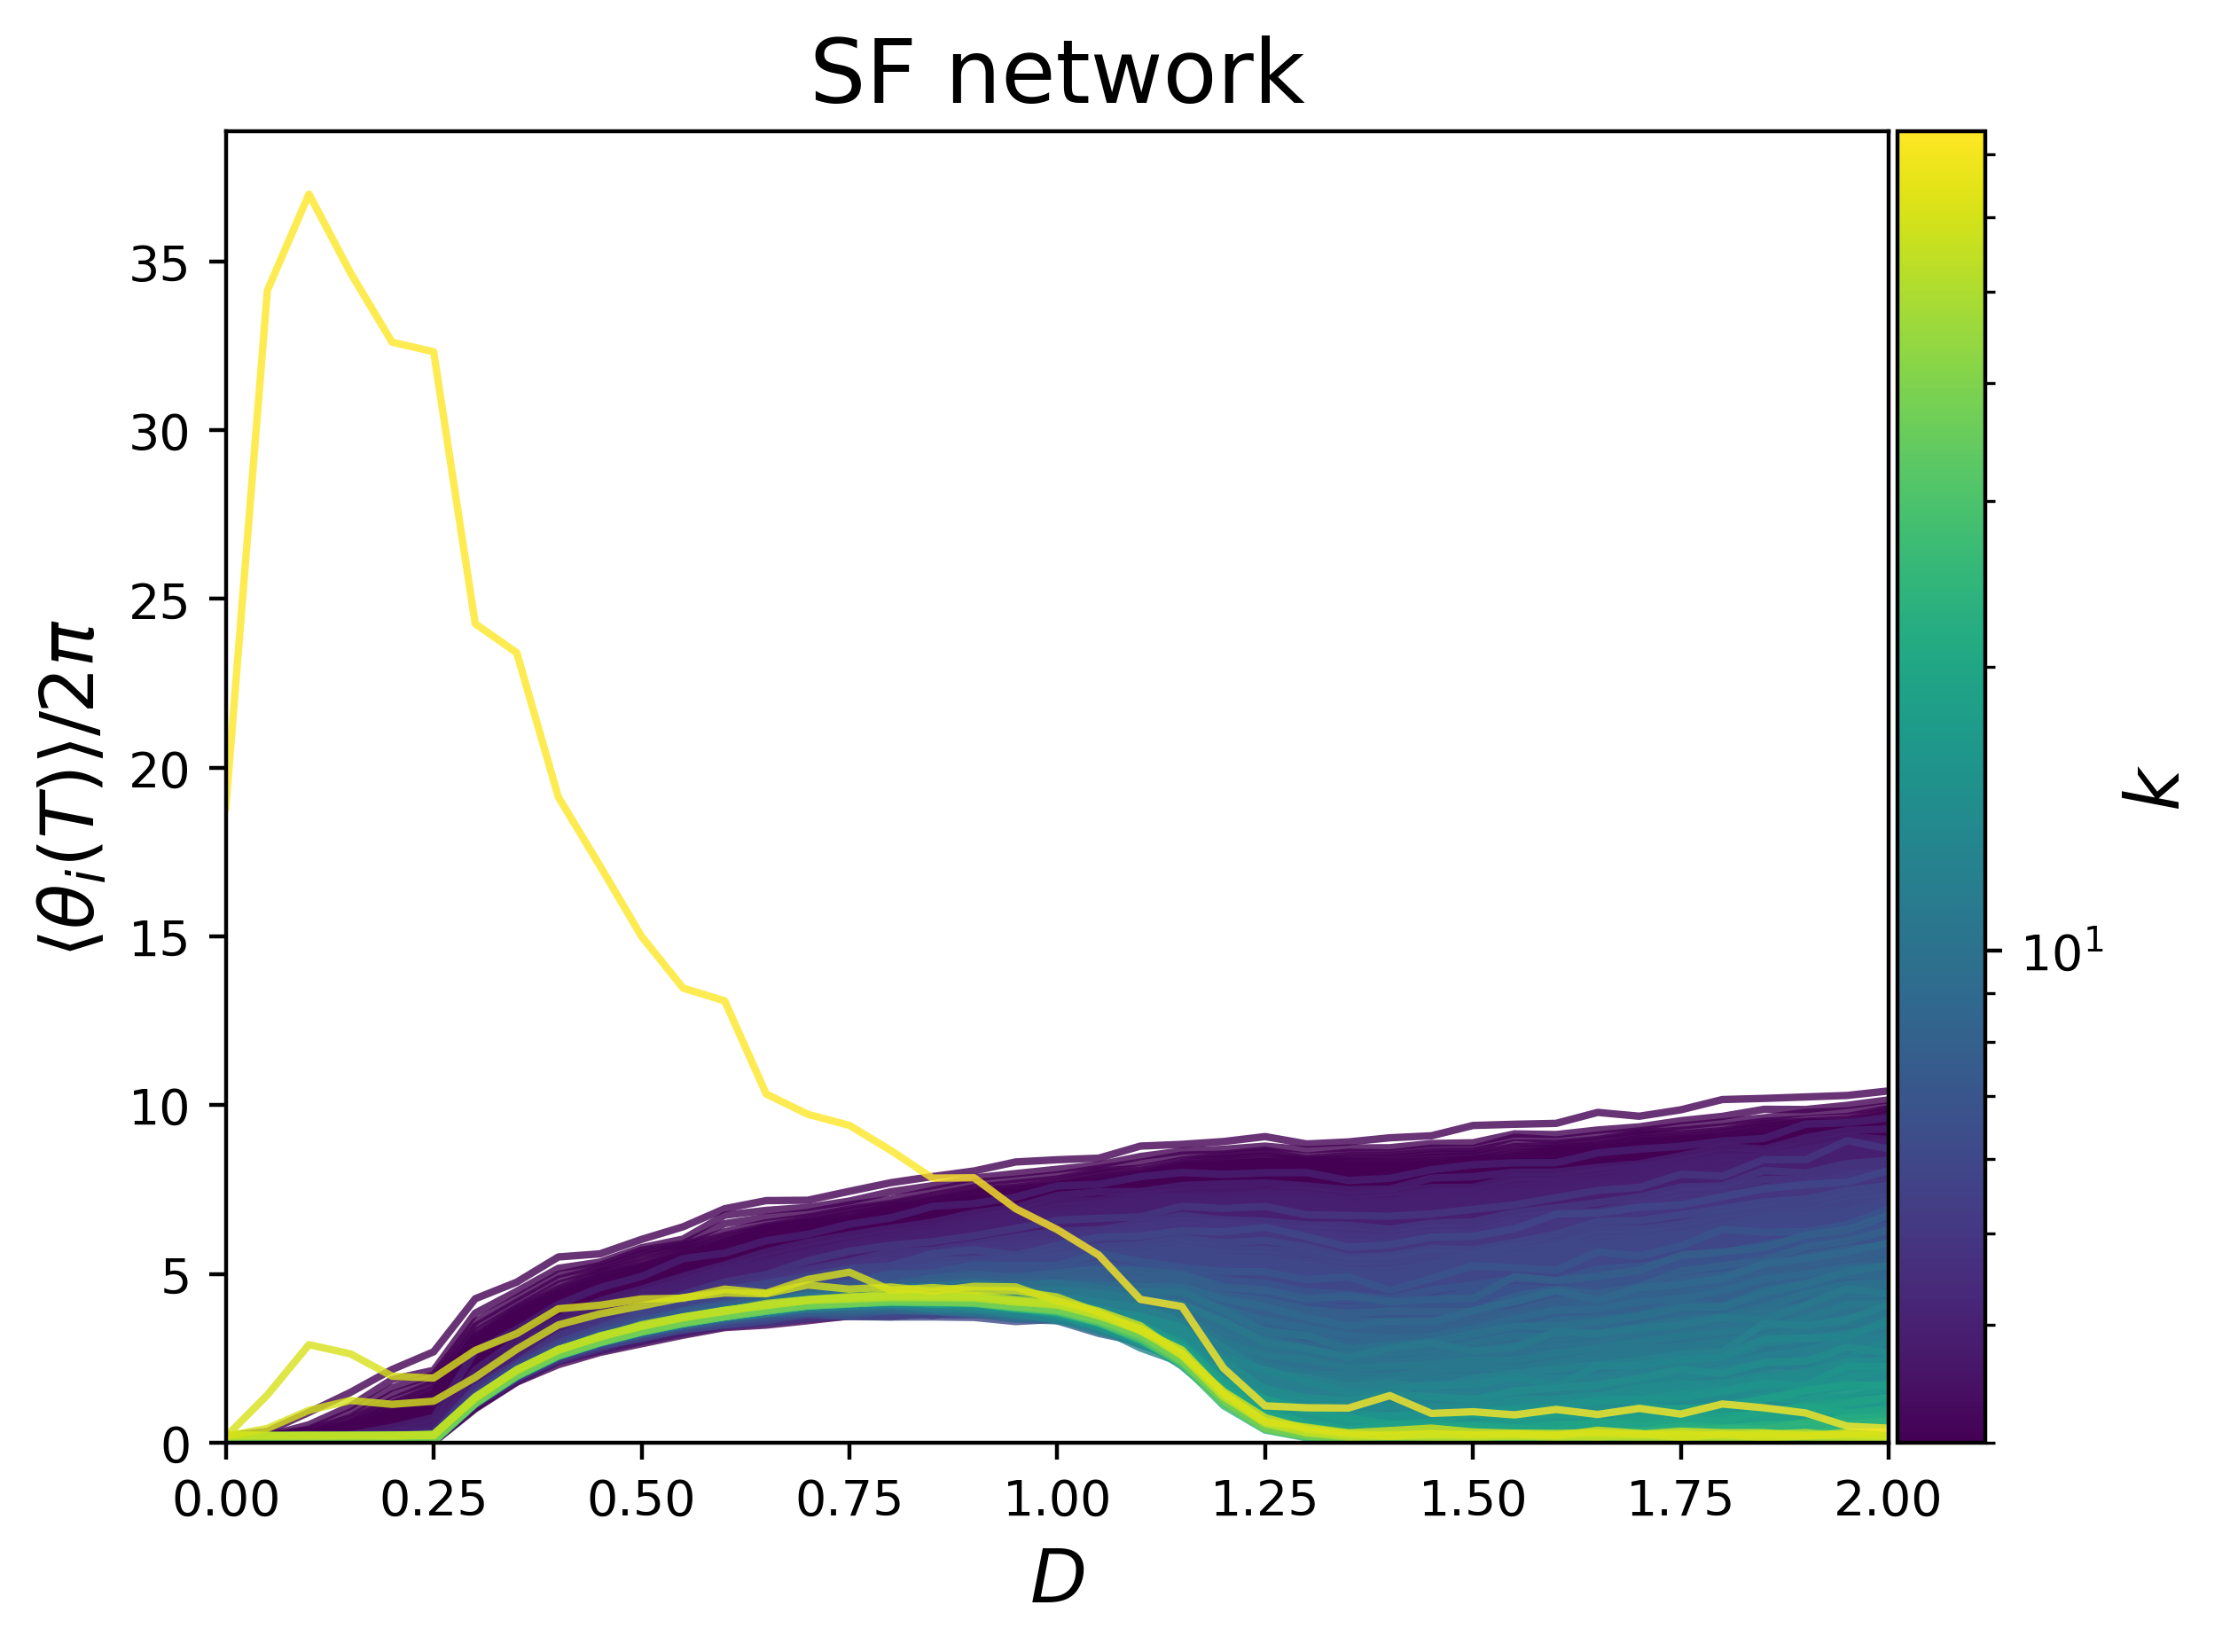

In [47]:
fig,(ax1,cbar_ax) = plt.subplots(1,2,gridspec_kw={'width_ratios': [19, 1]},dpi=400)
plt.sca(ax1)
norm = colors.LogNorm(vmin=np.min(UND),vmax=np.max(UND))
cm = plt.cm.viridis
for D_ in UND:
    B_TN = B_T[:,:,arg_ND[D_]]/(np.pi*2)
    B_TN = np.sort(B_TN,axis=2)/(np.pi*2)
    B_TNM = np.mean(B_TN,axis=0)
    B_TNS = np.std(B_TN,axis=0)
    plt.plot(Ds,B_TNM,color=cm(norm(D_)),alpha=0.8)
    # plt.plot(Ds,np.sort(B_T[:,:,arg_ND[D_]]//(np.pi*2),axis=1),color=c,alpha=0.8)

# plt.colorbar()


plt.ylabel(r'$\langle\theta_i(T)\rangle/2\pi$',fontsize=15)
plt.xlabel(r'$D$',fontsize=15)
plt.ylim(0,)
plt.xlim(0,2)
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cm, norm=norm, orientation='vertical')
cb1.set_label(r'$k$',fontsize=15)
plt.subplots_adjust(wspace=0.01)
plt.title('SF network',fontsize=18)

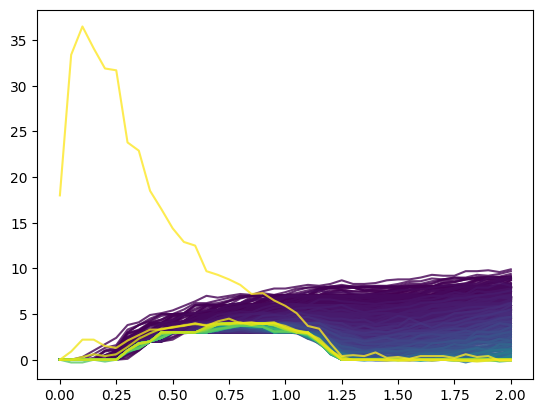

In [44]:
color = np.linspace(0,1,len(UND))
cm = plt.cm.viridis(color)
for D_,c in zip(UND,cm):
    B_TN = B_T[:,:,arg_ND[D_]]//(np.pi*2)
    B_TN = np.sort(B_TN,axis=2)//(np.pi*2)
    B_TNM = np.mean(B_TN,axis=0)
    B_TNS = np.std(B_TN,axis=0)
    plt.plot(Ds,B_TNM,color=c,alpha=0.8)
    # plt.plot(Ds,np.sort(B_T[:,:,arg_ND[D_]]//(np.pi*2),axis=1),color=c,alpha=0.8)


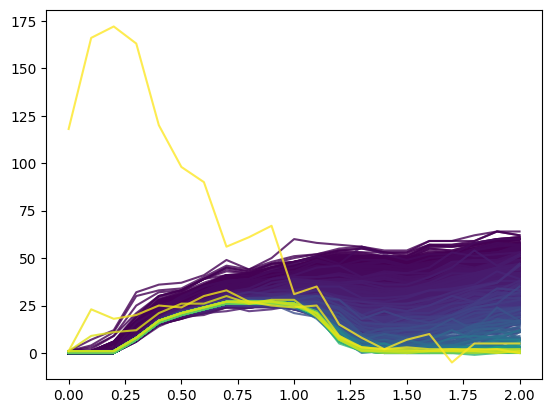

In [28]:
color = np.linspace(0,1,len(UND))
cm = plt.cm.viridis(color)
for D_,c in zip(UND,cm):
    plt.plot(Ds,np.sort(B_T[2][:,arg_ND[D_]]//(np.pi*2),axis=1),color=c,alpha=0.8)
